In [4]:
# Task 3.1

class Student:
    def __init__(self, StudID, Name, StudType, Result):
        self.setStudID(StudID)
        self.setName(Name)
        self.setStudType(StudType)
        self.setResult(Result)
        
    ### Getter Methods ##############################
    def getStudID(self):
        return self.__StudID
    def getName(self):
        return self.__Name
    def getStudType(self):
        return self.__StudType
    def getResult(self):
        return self.__Result
    
    ### Setter Methods ##############################
    def setStudID(self, StudID):
        self.__StudID = int(StudID)
        
    def setName(self, Name):
        self.__Name = str(Name)
        if len(self.__Name) > 30:
            raise Exception(f"Name {self.__Name} is invalid, is more than 30 characters")
        
    def setStudType(self, StudType):
        if str(StudType) not in ['D', 'S']:
            raise Exception(f"StudType {StudType} not 'D' or 'S' ")
        self.__StudType = StudType
        
    def getPossibleResults(self, Result):
        return [''] # unimplemented
    
    def setResult(self, Result):
        if Result not in self.getPossibleResults():
            raise Exception(f"Invalid Result of {Result}")
        self.__Result = Result
    
    def __str__(self):
        return f"{self.getStudID}|{self.getName}|{self.getStudTupe}"
        
class Diploma(Student):
    def __init__(self, StudID, Name, StudType, Result, NoOfSub):
        super().__init__(StudID, Name, StudType, Result)
        self.setNoOfSub(NoOfSub)
        self.setResult(Result)
        
    def getNoOfSub(self):
        return self.__NoOfSub
    
    def setNoOfSub(self, NoOfSub):
        if not NoOfSub >= 0:
            raise Exception(f"Invalid NoOfSub of {NoOfSub}")
        self.__NoOfSub = int(NoOfSub)
    
    
    def getPossibleResults(self):
        return ['', 'A', 'B', 'C', 'D', 'E', 'F']
        
class SkillsCert(Student):
    def __init__(self, StudID, Name, StudType, Result, SkillArea):
        super().__init__(StudID, Name, StudType, Result)
        self.setResult(Result)       
        self.setSkillArea(SkillArea)
    
    def getSkillArea(self):
        return self.__SkillArea
    
    def getPossibleResults(self):
        return ['', 'D', 'M', 'P', 'F']
        
    def setSkillArea(self, SkillArea):
        if str(SkillArea) not in ['IT', 'Business', 'Accountancy']:
            raise Exception(f"SkillArea {SkillArea} invalid ")
        self.__SkillArea = SkillArea
        


In [6]:
# Task 3.2

import csv

def readFileCSV(filename='STUDENT.txt'):
    data = []
    fastIDLookup = {}
    counter = 0
    
    file = open(filename) #,'r')
    reader = csv.reader(file, delimiter='|')
    for record in reader:
        StudID = int(record[0])
        Name = record[1]
        StudType = record[2]
        SkillArea = record[3]
        NoOfSub = int(record[4])
        Result = record[5]
        if SkillArea == "Diploma":
            obj = Diploma(StudID, Name, StudType, Result, NoOfSub)
        else:
            obj = SkillsCert(StudID, Name, StudType, Result, SkillArea)
            
        data.append(obj)
        fastIDLookup[StudID] = counter
        counter += 1
        
    file.close()
    return data, fastIDLookup

def ENTER_RESULT(data, fastIDLookup):
    StudID = input("Enter StudID: ")
    while not (StudID.isdigit() and int(StudID) in fastIDLookup.keys()):
        print("ID input in not found")
        StudID = input("Enter StudID: ")
    
    StudID = int(StudID)
    index =  fastIDLookup[StudID]
    obj = data[index]
    
    Result = input("Enter Result: ")
    while Result not in obj.getPossibleResults():
        print(f"Result given not in valid results {obj.getPossibleResults()}")
        Result = input("Enter Result: ")
    
    obj.setResult(Result)

def writeFileCSV(data, filename='STUDENT.txt'):
    file = open(filename,'w')
    for obj in data:
        if type(obj) == Diploma:
            SkillArea = "Diploma"
            NoOfSub = obj.getNoOfSub()
        else:
            SkillArea = obj.getSkillArea()
            NoOfSub = 0
        line = f"{obj.getStudID()}|{obj.getName()}|{obj.getStudType()}|{SkillArea}|{NoOfSub}|{obj.getResult()}\n"
        file.write(line)
    file.close()

### Main ##################
def task3_2():
    data, fastIDLookup = readFileCSV(filename='STUDENT.txt')
    #print(data, fastIDLookup)
    ENTER_RESULT(data, fastIDLookup)
    ENTER_RESULT(data, fastIDLookup)
    ENTER_RESULT(data, fastIDLookup)
    writeFileCSV(data)
task3_2()

Enter StudID: 201701
Enter Result: A
Enter StudID: 201801
Enter Result: B
Enter StudID: 201901
Enter Result: M


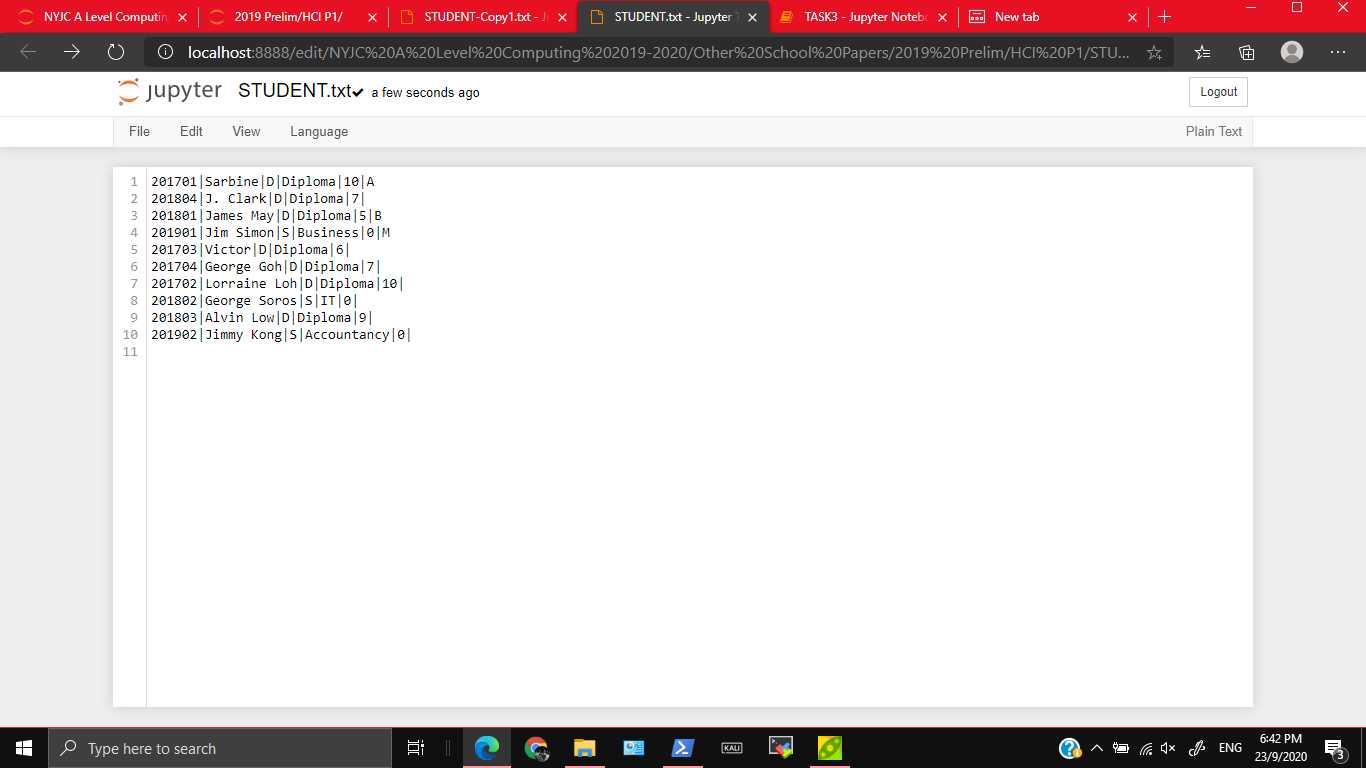

In [13]:
# Task 3.3

def displayForYear(data, fastIDLookup, year):
    output = f"Year: {year}"
    output += f"\n--------------------------------------------"
    
    diplomas = 0
    skills = 0
    for ID in fastIDLookup.keys():
        obj = data[fastIDLookup[ID]]
        if ID // 100 == year and obj.getResult() == '':
            
            
            if type(obj) == Diploma:
                typeName = 'D'
                extra = obj.getNoOfSub()
                diplomas += 1
            elif type(obj) == SkillsCert:
                typeName = 'S'
                extra = obj.getSkillArea()
                skills += 1
            
            output += f"\n{obj.getStudID():<10}{obj.getName():<15}{typeName:<5}{extra:<10}"
                
    output += f"\n{'Diplomas:':<10}{diplomas}"
    output += f"\n{'Skills:':<10}{skills}"
    print(output)
    print()
    
### Main ##################
def task3_3():
    data, fastIDLookup = readFileCSV(filename='STUDENT.txt')
    
    years = []
    for ID in fastIDLookup.keys():
        year = ID // 100
        if year not in years:
            years.append(year)
        
    for year in years:
        displayForYear(data, fastIDLookup, year)
    
task3_3()

Year: 2017
--------------------------------------------
201703    Victor         D    6         
201704    George Goh     D    7         
201702    Lorraine Loh   D    10        
Diplomas: 3
Skills:   0

Year: 2018
--------------------------------------------
201804    J. Clark       D    7         
201802    George Soros   S    IT        
201803    Alvin Low      D    9         
Diplomas: 2
Skills:   1

Year: 2019
--------------------------------------------
201902    Jimmy Kong     S    Accountancy
Diplomas: 0
Skills:   1



In [ ]:
# Done with 1h left lol (so about 1h 15min spent?)